<a href="https://colab.research.google.com/github/Thaseen863/nm-project/blob/main/NM_project_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [ ]:
# Step 2: Loading the Dataset
# ------------------------------
file_path = 'synthetic_house_prices.csv'
data = pd.read_csv(file_path)

# Display the first five rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Info of the dataset
print(data.info())

   LotArea  YearBuilt  OverallQual  OverallCond  GrLivArea  GarageCars  \
0     9270       1911            8            6       3301           3   
1     2860       1919           10            2       2910           3   
2     7390       1904            6            8       1806           1   
3     7191       1936            3            9       2076           1   
4    13964       1937            7            4        835           0   

   FullBath  BedroomAbvGr  TotRmsAbvGrd Neighborhood  SalePrice  
0         2             1            10      Mitchel     125955  
1         2             5             3      CollgCr     496164  
2         2             3             5      CollgCr     197748  
3         3             4            10      CollgCr     144791  
4         3             3             5      Crawfor     212586  
            LotArea    YearBuilt  OverallQual  OverallCond    GrLivArea  \
count   1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean    8

Non-numeric columns: Index(['Neighborhood'], dtype='object')
NaN values in correlation matrix: 0


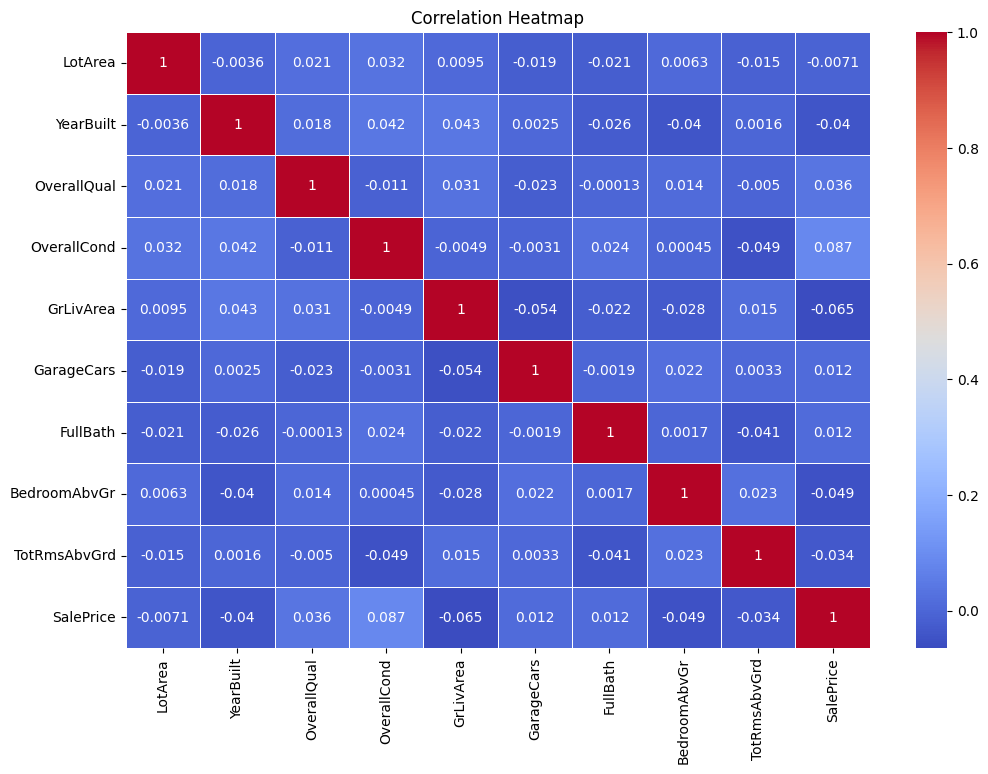

In [ ]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# If there are non-numeric columns, drop them for correlation
if len(non_numeric_columns) > 0:
    data_numeric = data.drop(columns=non_numeric_columns)
else:
    data_numeric = data

# Generate the correlation matrix
corr_matrix = data_numeric.corr()

# Check for NaN values
print(f"NaN values in correlation matrix: {corr_matrix.isnull().sum().sum()}")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

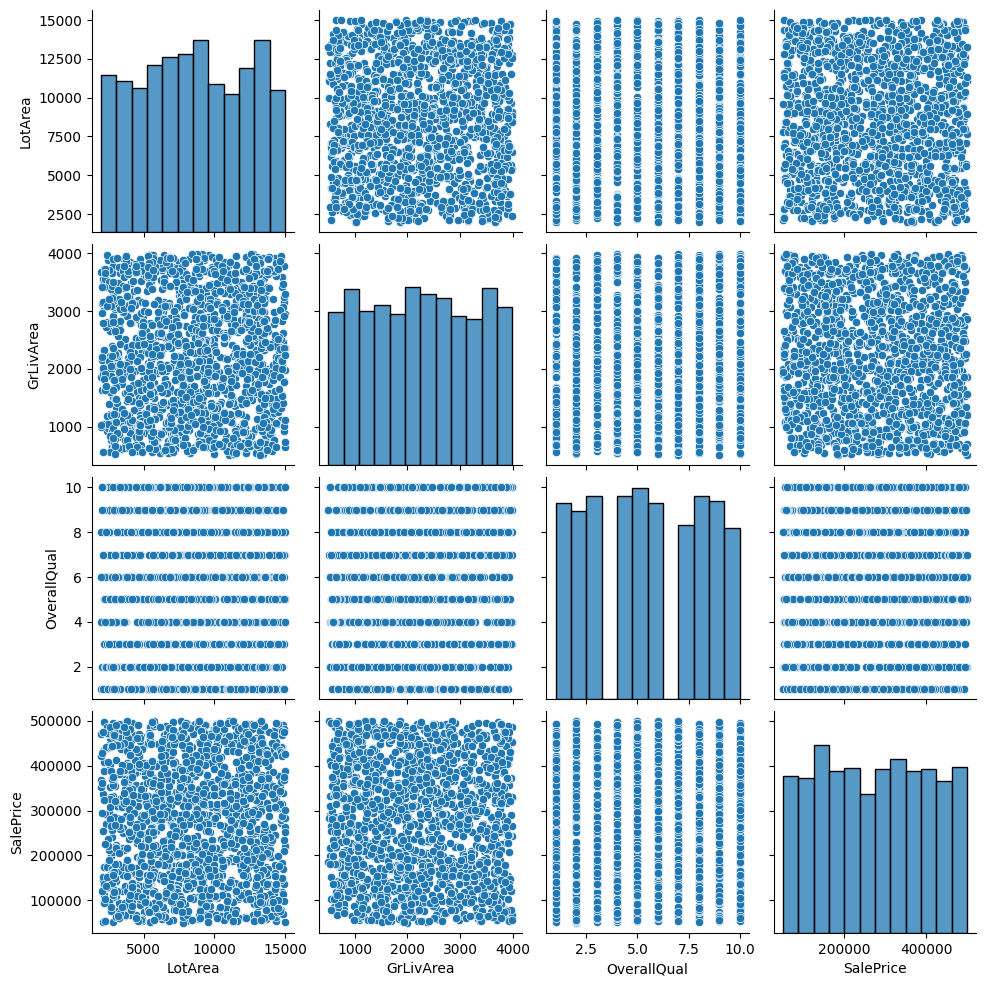

In [ ]:
# Pair Plot for Numerical Features
sns.pairplot(data[['LotArea', 'GrLivArea', 'OverallQual', 'SalePrice']])
plt.show()

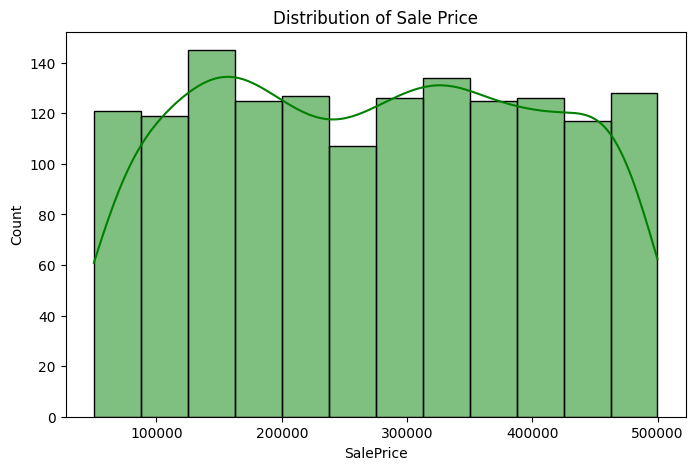

In [ ]:
# Distribution of SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], kde=True, color='green')
plt.title('Distribution of Sale Price')
plt.show()

<ipython-input-8-fa08620664dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Neighborhood'].value_counts().index, y=data['Neighborhood'].value_counts().values, palette='viridis')


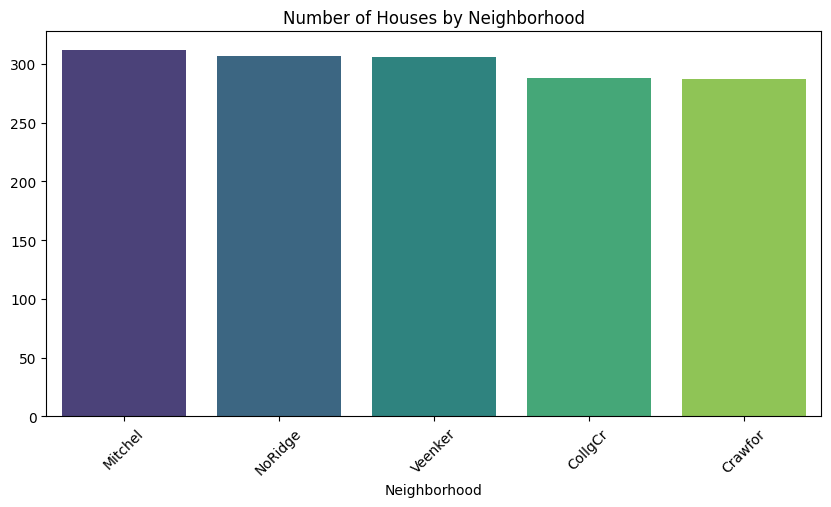

''

In [ ]:
# Bar Plot for Neighborhood
plt.figure(figsize=(10, 5))
sns.barplot(x=data['Neighborhood'].value_counts().index, y=data['Neighborhood'].value_counts().values, palette='viridis')
plt.title('Number of Houses by Neighborhood')
plt.xticks(rotation=45)
plt.show()
""

In [ ]:
#Step 4: Data Preprocessing
# ------------------------------

# 1. Encoding categorical features
data = pd.get_dummies(data, columns=['Neighborhood'], drop_first=True)

# 2. Splitting features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1200, 13)
Testing data shape: (300, 13)


In [ ]:
# Ddefine models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Linear Regression - MAE: 109271.12, MSE: 16306605846.49, RMSE: 127697.32, R2: -0.03
Ridge Regression - MAE: 109260.13, MSE: 16303634875.01, RMSE: 127685.69, R2: -0.03
Lasso Regression - MAE: 109269.88, MSE: 16306288572.55, RMSE: 127696.08, R2: -0.03
Random Forest - MAE: 111778.67, MSE: 17379612705.24, RMSE: 131831.76, R2: -0.10
Gradient Boosting - MAE: 110309.26, MSE: 17080863327.51, RMSE: 130693.78, R2: -0.08


In [ ]:
# Ensure grid_search is fitted before accessing the best estimator
if grid_search.best_estimator_ is not None:
    best_rf = grid_search.best_estimator_
else:
    print("Error: GridSearchCV wasn't fitted successfully.")

# Train the best model (using Random Forest in this case) on the entire dataset
best_rf.fit(X_train, y_train)

# Make final predictions on the test data
final_predictions = best_rf.predict(X_test)

# Evaluate final model performance
final_mae = mean_absolute_error(y_test, final_predictions)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final Model - MAE: {final_mae:.2f}, MSE: {final_mse:.2f}, RMSE: {final_rmse:.2f}, R2: {final_r2:.2f}")

NameError: name 'grid_search' is not defined

In [ ]:
# ------------------------------
# Step 8: Conclusion
# ------------------------------
# Check if final_predictions are available and valid
if len(final_predictions) > 0:
    final_mae = mean_absolute_error(y_test, final_predictions)
    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)
    final_r2 = r2_score(y_test, final_predictions)

    # Display final performance metrics
    print(f"Final Model - MAE: {final_mae:.2f}, MSE: {final_mse:.2f}, RMSE: {final_rmse:.2f}, R2: {final_r2:.2f}")
else:
    print("Error: Final predictions are empty or not available.")

# Optionally, save the final model
import joblib
try:
    joblib.dump(best_rf, 'house_price_forecasting_model.pkl')
    print("Model saved as 'house_price_forecasting_model.pkl'")
except Exception as e:
    print(f"Error saving model: {e}")


NameError: name 'final_predictions' is not defined

Model Comparison Report:
               Model            MAE           MSE           RMSE        R2
1   Ridge Regression  109260.128612  1.630363e+10  127685.687824 -0.027622
2   Lasso Regression  109269.882214  1.630629e+10  127696.078924 -0.027789
0  Linear Regression  109271.119498  1.630661e+10  127697.321219 -0.027809
4  Gradient Boosting  110423.236669  1.709286e+10  130739.662500 -0.077366
3      Random Forest  111782.918267  1.731466e+10  131585.192676 -0.091347


<ipython-input-15-2dcbbf219c4e>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=comparison_df, palette='viridis')


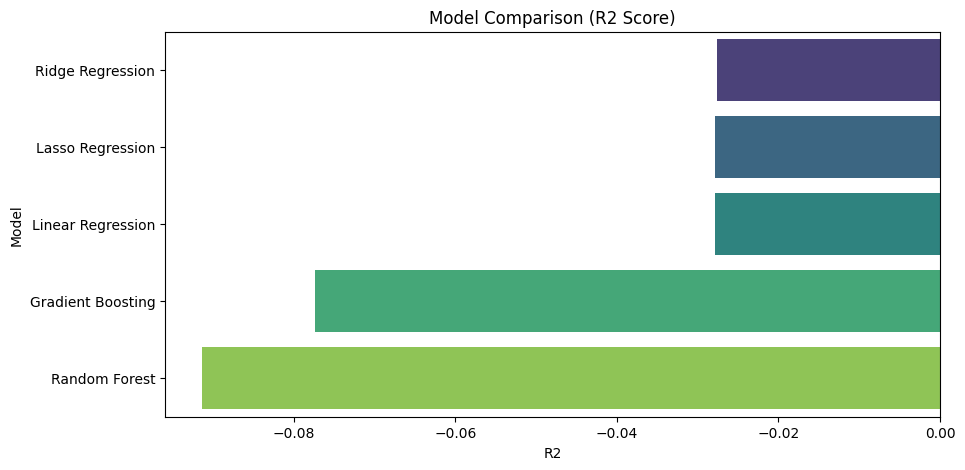

In [ ]:
# ------------------------------
# Step 9: Model Comparison & Reporting
# ------------------------------

# Store model names and their corresponding evaluation metrics
model_comparison = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics in a list
    model_comparison.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

# Convert the list into a DataFrame for easier visualization
comparison_df = pd.DataFrame(model_comparison)

# Sort models by R2 score for better readability
comparison_df = comparison_df.sort_values(by='R2', ascending=False)

# Display the model comparison table
print("Model Comparison Report:")
print(comparison_df)

# Optionally, visualize model performance using a bar plot for R2 score
plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Model', data=comparison_df, palette='viridis')
plt.title('Model Comparison (R2 Score)')
plt.show()

In [ ]:
# Example: Saving Model Comparison to CSV
comparison_df.to_csv('model_comparison.csv', index=False)

In [ ]:
# Saving the best model (e.g., Random Forest)
import joblib
joblib.dump(best_rf, 'house_price_forecasting_model.pkl')

NameError: name 'best_rf' is not defined